In [1]:
import numpy as np
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import Cluster as clust
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/picture/"
from matplotlib import colormaps
cm = colormaps['viridis']
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"

In [2]:
names = ["E-15_N100_ell2E3_kdiffE-3_picture.hdf","E-15_N100_ell2E3_kdiffE-4_picture.hdf"]

In [3]:
pictures = list()
for name in names:
    pictures.append( Data_Treatement(media+name,data_type='Picture'))
    

In [4]:
pictures[0].data.shape

(50, 10, 100, 3)

In [5]:
time_stamps = [0.0, 42.64286966841622, 89.01526863840375, 182.427843592196,
       371.05076967348083, 750.8431073052468, 1511.8981528435368,
       3026.99447631168, 6017.146743911477, 11878.023867514607]

In [6]:
time_stamps.__len__()

10

In [7]:

#tint = 5
indx = 3
system_number = 0
print(pictures[system_number].attributes)
n_av = np.zeros(10,dtype=float)
for indx in range(50):
    for tint in range(10):
        clustering = clust.AgglomerativeClustering(n_clusters=None, distance_threshold=2., linkage='single')
        clustering.fit(pictures[system_number].data[indx][tint])
        n_av[tint]+=(100/np.unique(clustering.labels_).shape[0])/50



{'ell_tot': 2000, 'Energy': -15, 'kdiff': 0.001, 'seed': 866564, 'Nlinker': 100, 'dimension': 3, 'step_tot': 10000000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Picture': (<class 'Picture.Picture'>, ())}", 'MSD_args': {'Picture': True, 'NRG': False, 'Cluster': False, 'MSD': False, 'ISF': False, 'PCF': False, 'PCF_L': False}, 'ISF_arg': 2.0}


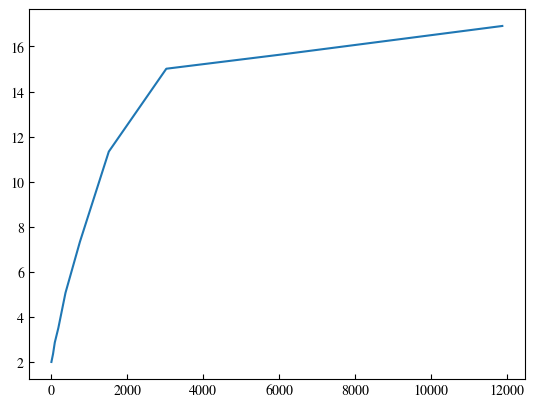

In [9]:
plt.plot(time_stamps,n_av)
#plt.xscale('log')

{'ell_tot': 2000, 'Energy': -15, 'kdiff': 0.0001, 'seed': 557568, 'Nlinker': 100, 'dimension': 3, 'step_tot': 100000000, 'check_steps': 10000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Picture': (<class 'Picture.Picture'>, ())}", 'MSD_args': {'Picture': True, 'NRG': False, 'Cluster': False, 'MSD': False, 'ISF': False, 'PCF': False, 'PCF_L': False}, 'ISF_arg': 2.0}


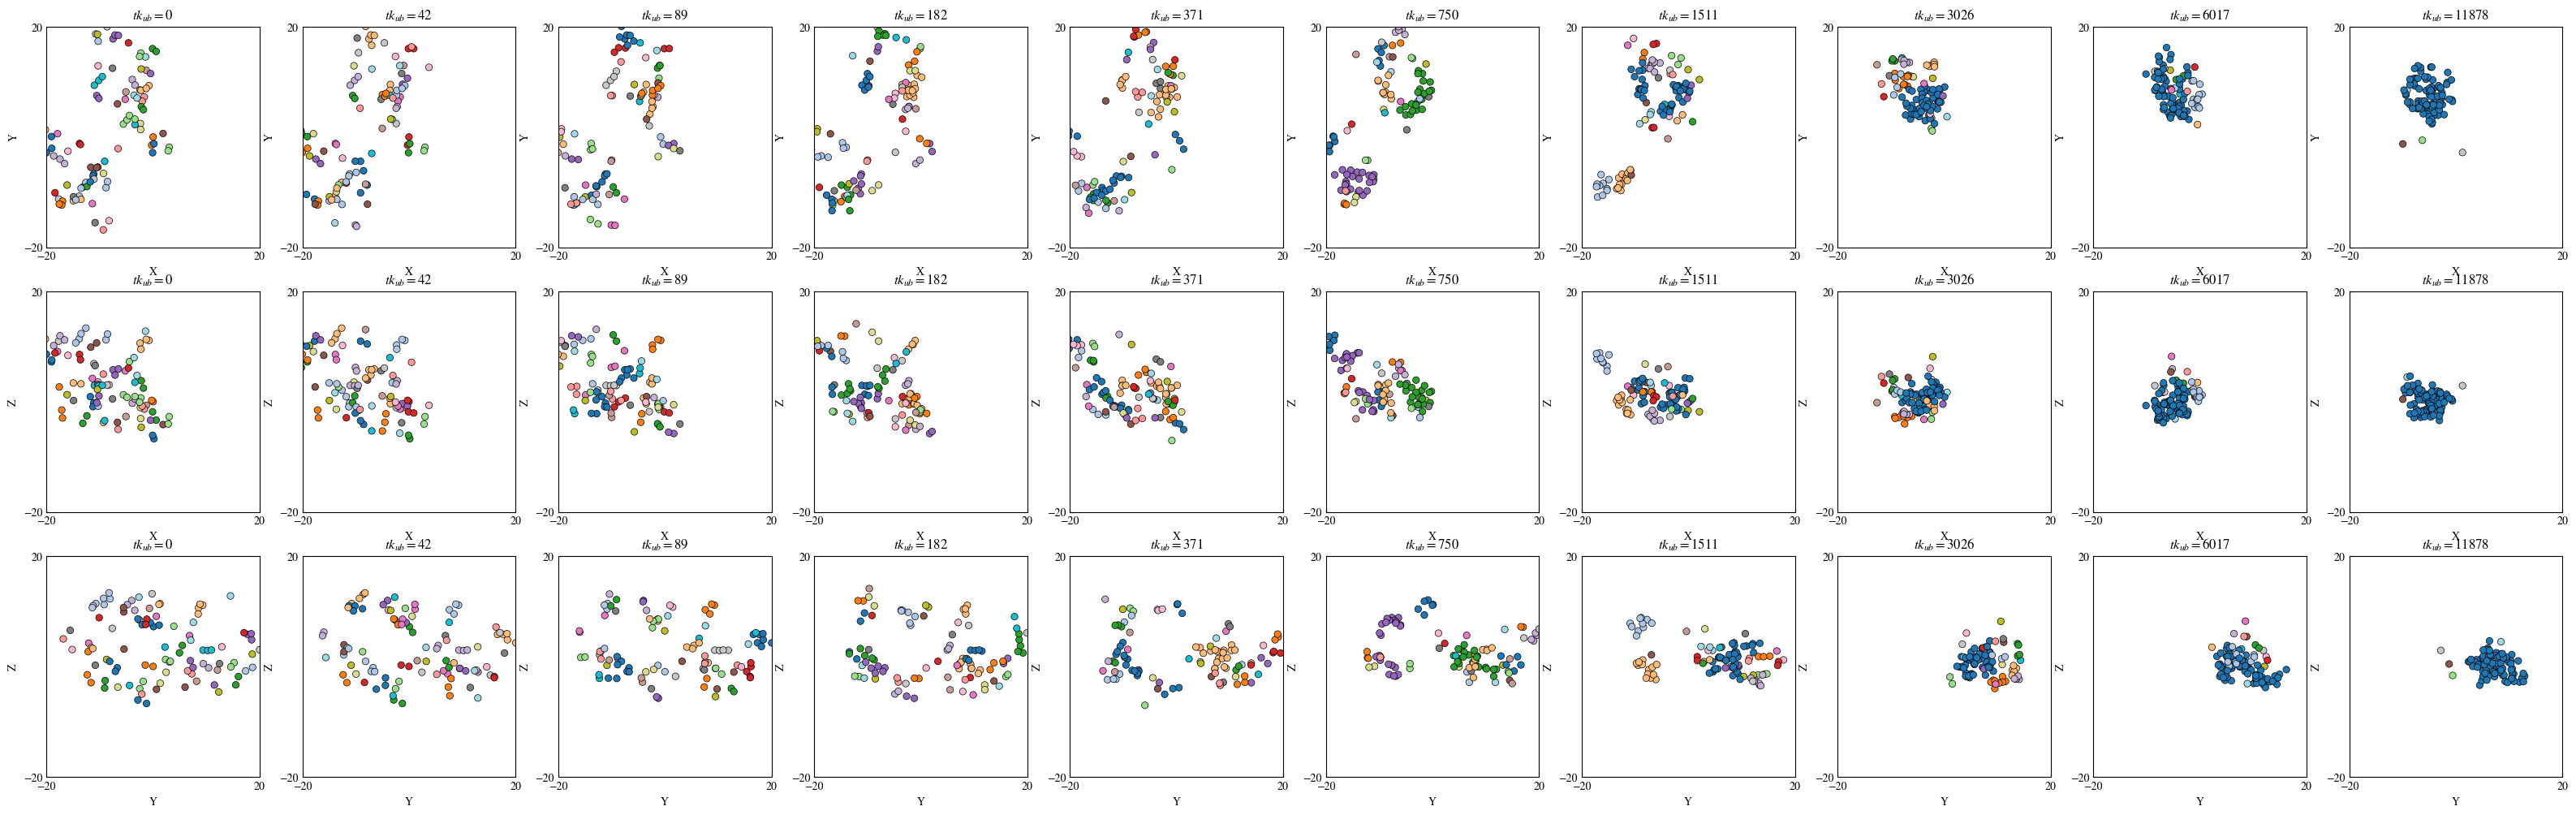

In [10]:

fig,ax = plt.subplots(ncols=10,nrows=3,figsize=(40,12))
#ax[0,0].scatter(pictures[0].data[indx][0][:,0],pictures[0].data[indx][0][:,1])
#ax[0,0].set_title('t initial')
#ax[1,0].scatter(pictures[0].data[indx][-1][:,0],pictures[0].data[indx][-1][:,1])
#ax[1,0].set_title('t final')
#ax[0,1].scatter(pictures[0].data[indx][0][:,0],pictures[0].data[indx][0][:,2])
#ax[0,1].set_title('t initial')
#ax[1,1].scatter(pictures[0].data[indx][-1][:,0],pictures[0].data[indx][-1][:,2])
#ax[1,1].set_title('t final')

#tint = 5
indx = 3
system_number = 1
print(pictures[system_number].attributes)
for tint in range(10):
    clustering = clust.AgglomerativeClustering(n_clusters=None, distance_threshold=2., linkage='single')
    clustering.fit(pictures[system_number].data[indx][tint])
    ax[0,tint].scatter(pictures[system_number].data[indx][tint][:,0],pictures[system_number].data[indx][tint][:,1],c=clustering.labels_,cmap='tab20',edgecolor='k',linewidth=0.5)
    ax[1,tint].scatter(pictures[system_number].data[indx][tint][:,0],pictures[system_number].data[indx][tint][:,2],c=clustering.labels_,cmap='tab20',edgecolor='k',linewidth=0.5)
    ax[2,tint].scatter(pictures[system_number].data[indx][tint][:,1],pictures[system_number].data[indx][tint][:,2],c=clustering.labels_,cmap='tab20',edgecolor='k',linewidth=0.5)
    ax[0,tint].set_title(r'$tk_{ub}=$'+str(int(time_stamps[tint])))
    ax[1,tint].set_title(r'$tk_{ub}=$'+str(int(time_stamps[tint])))
    ax[2,tint].set_title(r'$tk_{ub}=$'+str(int(time_stamps[tint])))
    ax[0,tint].set_xlabel('X')
    ax[1,tint].set_xlabel('X')
    ax[0,tint].set_ylabel('Y')
    ax[1,tint].set_ylabel('Z')
    ax[2,tint].set_xlabel('Y')
    ax[2,tint].set_ylabel('Z')
    for i in range(3):
        ax[i,tint].set_xlim(-20,20)
        ax[i,tint].set_ylim(-20,20)
        ax[i,tint].set_xticks([-20,20])
        ax[i,tint].set_yticks([-20,20])
#fig.savefig('pictures_cluster.svg',transparent=True,bbox_inches='tight')

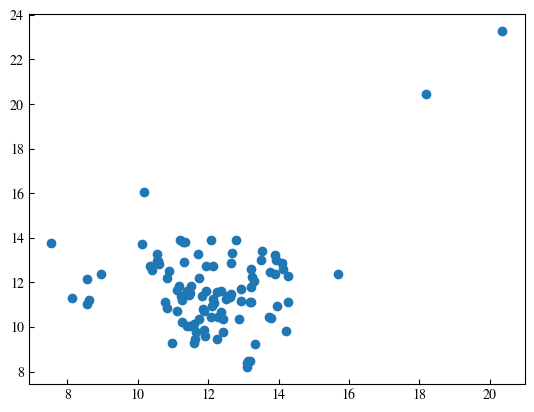

In [14]:

x = pictures[0].data[indx][-1][:,0]
y = pictures[0].data[indx][-1][:,1]
z = pictures[0].data[indx][-1][:,2]
plt.scatter(x,y)

AgglomerativeClustering(distance_threshold=3.65, linkage='single',
                        n_clusters=None)

In [21]:
clustering.labels_

array([2, 0, 3, 0, 0, 0, 4, 4, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 0,
       2, 0, 1, 1, 1, 7, 2, 1, 4, 2, 1, 2, 2, 0, 1, 3, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 3, 0, 2, 0, 0, 1, 1, 1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 6, 1, 0, 1, 0, 5, 3, 1, 1, 2, 0,
       0, 0, 2, 0, 4, 0, 0, 1, 1, 1, 3, 1])

(8.0, 15.0)

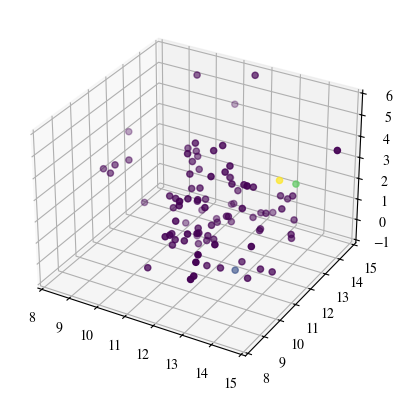

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = pictures[0].data[indx][-1][:,0]
y = pictures[0].data[indx][-1][:,1]
z = pictures[0].data[indx][-1][:,2]

# Create a 3D scatter plot
ax.scatter(x, y, z, marker='o',c=clustering.labels_)
ax.set_xlim((8,15))
ax.set_zlim((-1,6))
ax.set_ylim(8,15)


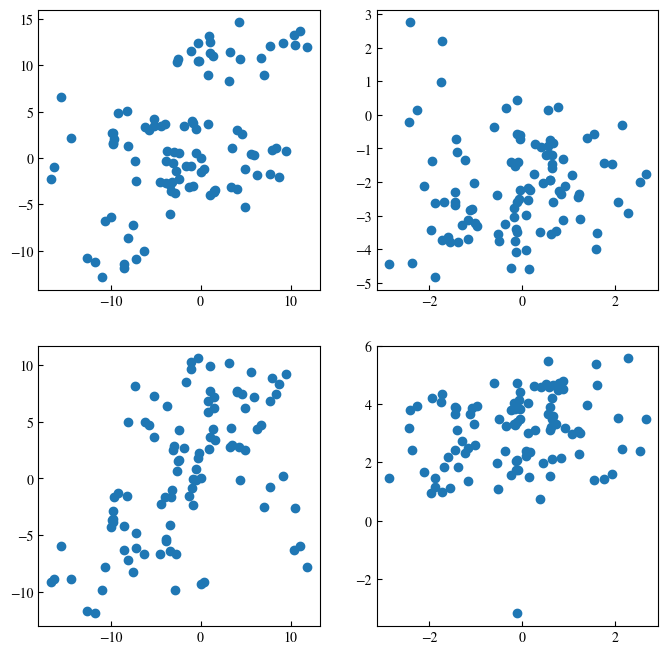

In [19]:
indx = 1
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(8,8))
ax[0,0].scatter(pictures[1].data[indx][0][:,0],pictures[1].data[indx][0][:,1])
ax[0,1].scatter(pictures[1].data[indx][-1][:,0],pictures[1].data[indx][-1][:,1])
ax[1,0].scatter(pictures[1].data[indx][0][:,0],pictures[1].data[indx][0][:,2])
ax[1,1].scatter(pictures[1].data[indx][-1][:,0],pictures[1].data[indx][-1][:,2])